ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **18Nov20**

# Laboratory Work 12 (19Nov20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Pyrolysis of ethyl nitrite in a closed reactor vessel.
 - [1.1)](#a11) Rank of the stoichiometric matrix.
 - [1.2)](#a12) Compute and report the equilibrium mole fractions in the reactor.
 - [1.3)](#a13) Plot all normalized extention of reaction roots.
 - [1.4)](#a14) Summary of key computational steps.
* [Assignment 2 (50 pts)](#a2) Pyrolysis of propane in a closed reactor vessel.
 - [2.1)](#a21) Rank of the stoichiometric matrix.
 - [2.2)](#a22) Compute and report the equilibrium mole fractions in the reactor.
 - [2.3)](#a23) Plot all normalized extention of reaction roots.
 - [2.4)](#a24) Summary of key computational steps.
* [Assignment 3 (5 pts)](#a3) Unclear points
---

## <span style="color:blue">Use the material covered in Notebook 15.</span>

## <span style="color:blue">[Assignment 1 (50 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue"> Find the equilibrium molar fraction for a model of the pyrolysis of ethyl nitrite in a closed reactor vessel: see file `data/ethyl-nitrite-rxn.txt`:
</span>

 Pyrolysis mechanism            |         $K_x$        |
--------------------------------|----------------------|
C2H5ONO      <=> C2H5O   + NO   | 5.02e+00        |
C2H5O        <=> CH3     + CH2O | 3.23e+00        |
C2H5O + NO   <=> CH3CHO  + HNO  | 2.12e+00        |
C2H5O + HNO  <=> C2H5OH  + NO   | 3.65e+00        |
2 NOH        <=> N2O     + H2O  | 1.45e-01   |
CH3 + NO     <=> CH3NO          | 1.67e+00     |
CH3NO        <=> CH2=NOH        | 1.09e-00   |
CH2=NOH      <=> HCN     + H2O  | 1.14e-01   |

### <span style="color:blue"> where $K_x$ the reaction equilibrium constant based on molar fraction. At some point in time, the charge to the reactor vessel was given:
</span>

| Species | Empirical Formula | Mole Fraction | Value [%] |
|-------------|-----------------|--------------|-------|
|ethyl nitrite     | C2H5ONO | $x_\text{C2H5ONO}$ |  90   |
|hydroxyethyl      | C2H5O   | $x_\text{C2H5O}$   | 1  |
|nitrogen monoxide | NO      | $x_\text{NO}$      | 1   |
|methyl radical    | CH3     | $x_\text{CH3}$     | 0.5  |
|formaldehyde      | CH2O    | $x_\text{CH2O}$    | 0.5     |
|acetaldehyde      | CH3CHO  | $x_\text{CH3CHO}$  | 1  |
|nitroxyl          | HNO     | $x_\text{HNO}$     | 0.5      |
|ethanol           | C2H5OH  | $x_\text{C2H5OH}$  | 1      |
|nitrogen hydroxide| NOH     | $x_\text{NOH}$     | 0.5      |
|nitric oxide      | N2O     | $x_\text{N2O}$     | 1      |
|water             | H2O     | $x_\text{H2O}$     | 1   |
|formamide         | CH3NO   | $x_\text{CH3NO}$   | 1      |
|formaldoxime      | CH2=NOH | $x_\text{CH2=NOH}$ | 0.5   |
|hydrogen cyanide  | HCN     | $x_\text{HCN}$     | 0.5      |

In [ ]:
'''Create as many cells as needed to organize the algorithms'''


In [15]:
'''Import the reaction mechanism'''


species= ['N2O', 'C2H5OH', 'CH3NO', 'CH3', 'C2H5ONO', 'H2O', 'NOH', 'HCN', 'HNO', 'CH2=NOH', 'CH2O', 'C2H5O', 'CH3CHO', 'NO']

r0 :  C2H5ONO     <=> C2H5O   + NO
r1 :  C2H5O       <=> CH3     + CH2O
r2 :  C2H5O + NO  <=> CH3CHO  + HNO
r3 :  C2H5O + HNO <=> C2H5OH  + NO
r4 :  2 NOH       <=> N2O     + H2O
r5 :  CH3 + NO    <=> CH3NO
r6 :  CH3NO       <=> CH2=NOH
r7 :  CH2=NOH     <=> HCN     + H2O
n_reactions = 8

K_x eq =  [5.02  3.23  2.12  3.65  0.145 1.67  1.09  0.114]

matrix shape = (8, 14)


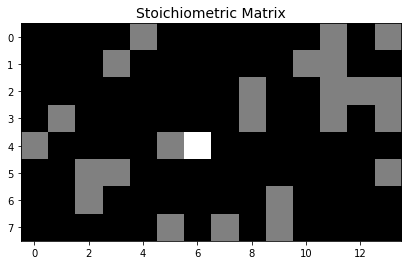


stoic_mtrx=
 [[ 0.  0.  0.  0. -1. ...  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  1.  0. ...  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. ...  0.  0. -1.  1. -1.]
 [ 0.  1.  0.  0.  0. ...  0.  0. -1.  0.  1.]
 [ 1.  0.  0.  0.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0. ...  0.  0.  0.  0. -1.]
 [ 0.  0. -1.  0.  0. ...  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. ... -1.  0.  0.  0.  0.]]


In [16]:
'''Info on the data'''


### <span style="color:blue">[1.1)](#toa) What is the rank of the stoichiometric matrix. Is it full rank? Or rank deficient? Justify your answer.</span><a id="a11"></a>

In [ ]:
'''Check the rank of the stoichiometric matrix'''


**Rank-related answers:**

### <span style="color:blue">[1.2)](#toa) Compute and report the equilibrium mole fractions for all species as follows (values are for your reference):</span><a id="a12"></a>
    
      formula      species name 
        xxxx         name         = 2.870e-01 (28.70%)
        xxxx         name         = 1.732e-01 (17.32%)
        xxxx         name         = 1.394e-01 (13.94%)
        xxxx         name         = 7.470e-02 (7.47%)
        xxxx         name         = 7.173e-02 (7.17%)
        xxxx         name         = 6.985e-02 (6.98%)
        xxxx         name         = 6.089e-02 (6.09%)
        xxxx         name         = 4.395e-02 (4.39%)
        xxxx         name         = 4.032e-02 (4.03%)
        xxxx         name         = 1.590e-02 (1.59%)
        xxxx         name         = 1.239e-02 (1.24%)
        xxxx         name         = 1.002e-02 (1.00%)
        xxxx         name         = 4.274e-04 (0.04%)
        xxxx         name         = 2.086e-04 (0.02%)

In [32]:
'''1.2) Find root and equilibrium molar fractions'''




**********************************************************
               Newton's Method Iterations                 
**********************************************************
k | |K(e_k)|  | |K'(e_k)| | |del e_k| |   |e_k|   | convg|
----------------------------------------------------------
 1  +6.237e+00  +1.540e+03  +1.775e-01  +6.216e-01 0.00
 2  +5.068e+00  +9.866e+02  +1.610e-01  +7.797e-01 1.06
 3  +4.028e+00  +6.769e+02  +8.803e-02  +8.530e-01 1.33
 4  +3.875e+00  +5.050e+02  +7.125e-02  +8.750e-01 1.09
 5  +3.846e+00  +4.026e+02  +8.424e-02  +9.077e-01 0.94
 6  +3.828e+00  +3.527e+02  +8.992e-02  +9.478e-01 0.97
 7  +3.764e+00  +3.627e+02  +8.797e-02  +9.908e-01 1.01
 8  +3.582e+00  +4.567e+02  +8.334e-02  +1.032e+00 1.02
 9  +3.193e+00  +7.019e+02  +8.713e-02  +1.070e+00 0.98
10  +2.659e+00  +1.218e+03  +1.088e-01  +1.110e+00 0.91
11  +1.929e+00  +2.032e+03  +1.368e-01  +1.163e+00 0.90
12  +8.329e-01  +3.033e+03  +1.092e-01  +1.212e+00 1.11
13  +1.011e-01  +4.272e+03  +4.

### <span style="color:blue">[1.3)](#toa) Plot all normalized extention of reaction roots:</span><a id="a13"></a>

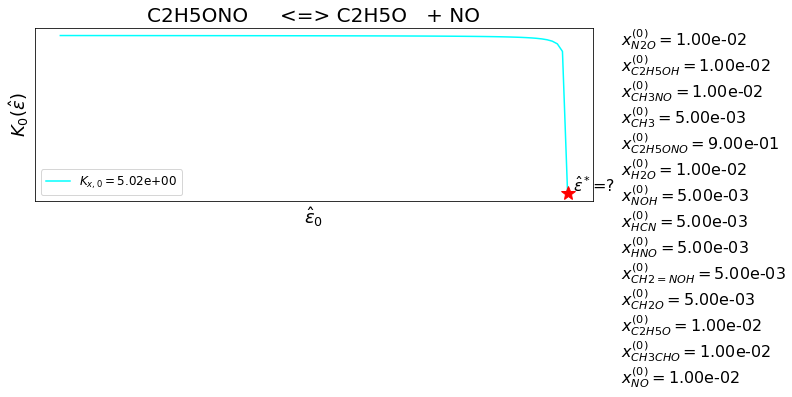

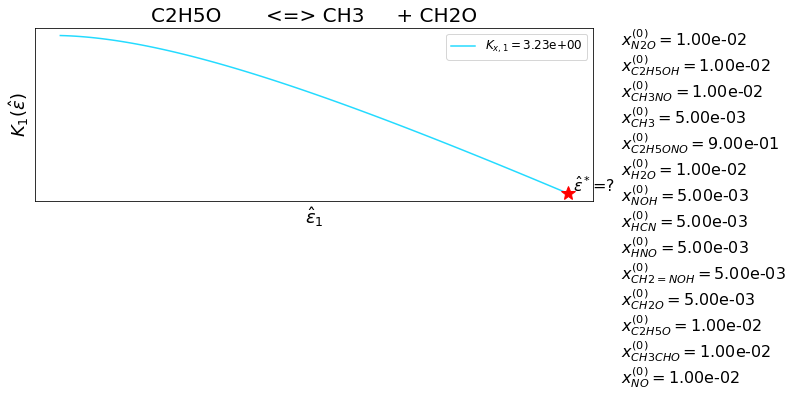

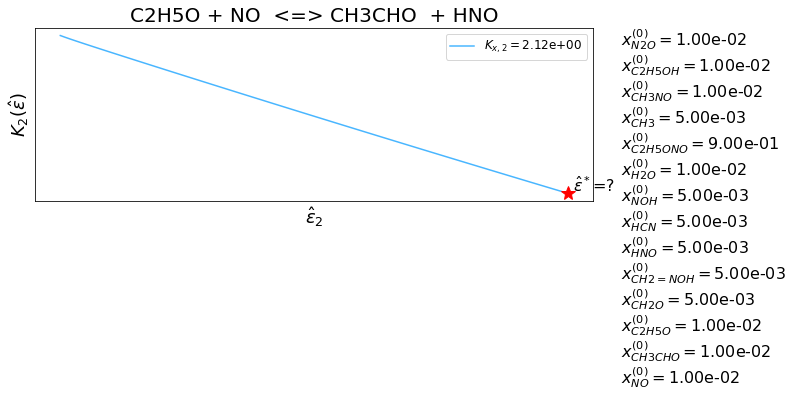

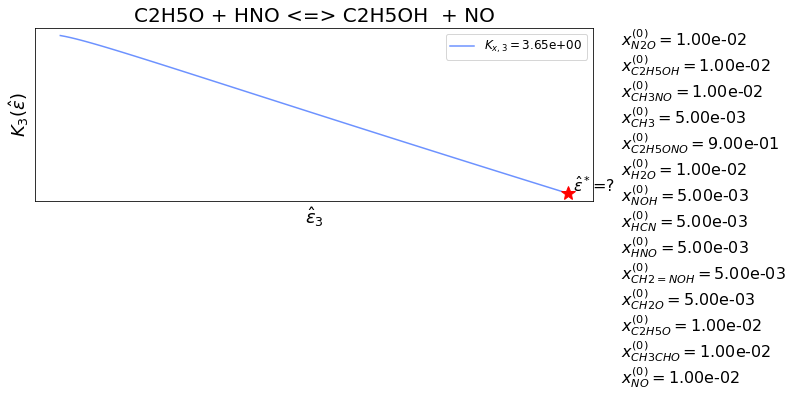

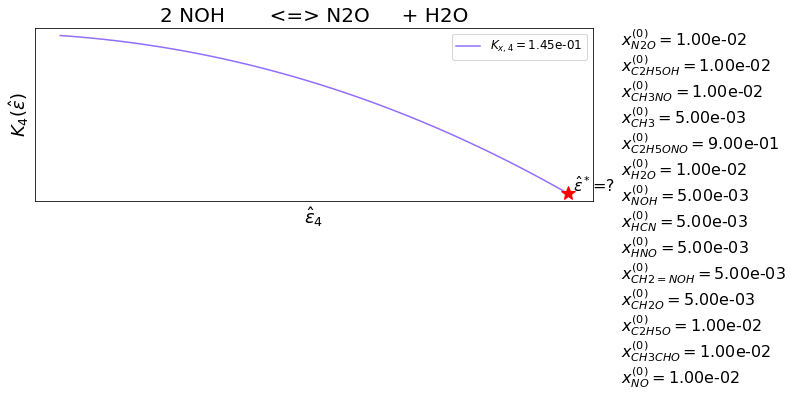

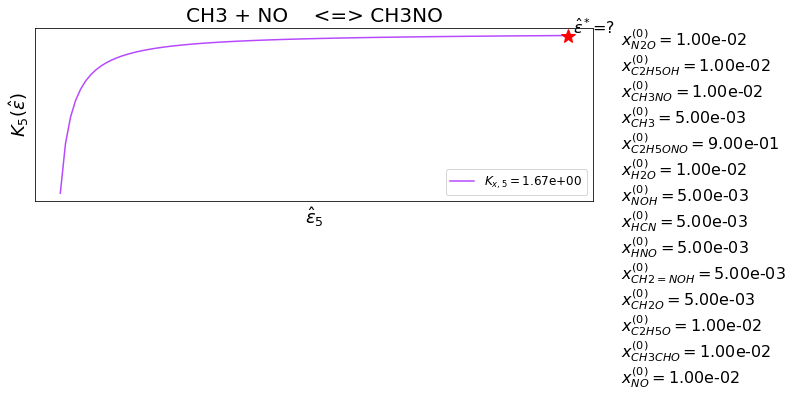

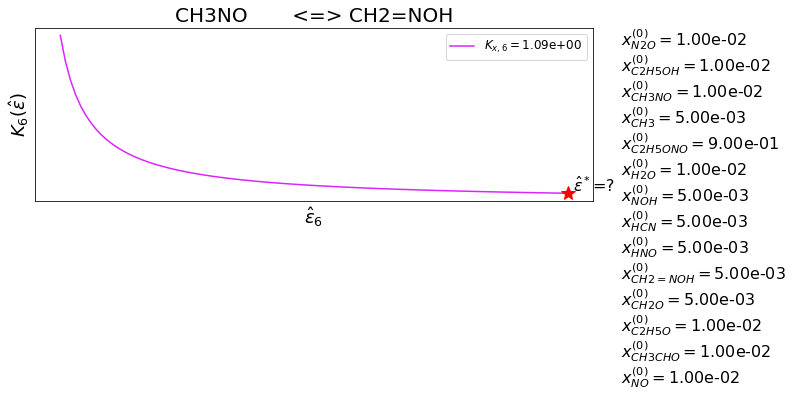

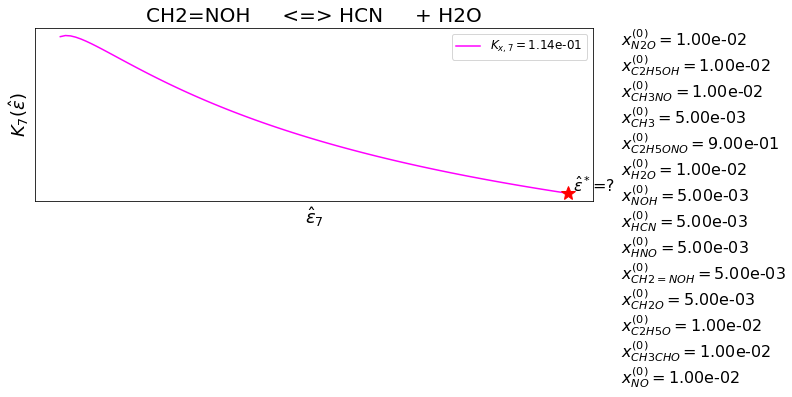

In [33]:
'''1.3) Plot equilibrium vector function'''


### <span style="color:blue">[1.4)](#toa) Summary of key computational steps needed to solve the problem.</span><a id="a14"></a>

**Key computation steps:**


## <span style="color:blue">[Assignment 2 (50 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue"> Find the equilibrium molar fraction for a model of the pyrolysis of propane in a closed reactor vessel: see file `data/propane-rxn.txt`:
</span>

 Pyrolysis mechanism            |         $K_x$        |
--------------------------------|----------------------|
C3H8         <-> CH3* + C2H5* |3.3e+01  |
C3H8 + H*    <-> H2 + C3H7*   |2.3e+01  |
C3H7*        <-> C3H6 + H*    |1.3e+00  |
C2H5*        <-> C2H4 + H*    |1.1e-01|
C3H7*        <-> C2H4 + CH3*  |3.0e-01|
C2H5* + C3H8 <-> C2H6 + C3H7* |1.3e+01|
CH3* + C3H8  <-> CH4 + C3H7*  |8.1e+00|
CH3* + C3H7* <-> C3H6 + CH4   |8.7e-01|

### <span style="color:blue"> where $K_x$ the reaction equilibrium constant based on molar fraction. At some point in time, the charge to the reactor vessel was given:
</span>

| Species | Empirical Formula | Mole Fraction | Value [%] |
|-------------|-----------------|--------------|-------|
|propylene     | C3H6 | $x_\text{C3H6}$ |  5   |
|ethylene     | C2H4   | $x_\text{C2H4}$   | 1  |
|methane | CH4      | $x_\text{CH4}$      | 10   |
|hydrogen radical    | H*     | $x_\text{H*}$     | 0.5  |
|ethane      | C2H6    | $x_\text{C2H6}$    | 0.5     |
|methyl radical      | CH3*  | $x_\text{CH3*}$  | 1  |
|ethyl radical         | C2H5*     | $x_\text{C2H5*}$     | 80      |
|propane           | C3H8  | $x_\text{C3H8}$  | 1      |
|hydrogen| H2     | $x_\text{H2}$     | 0.5      |
|propyl radical      | C3H7*     | $x_\text{C3H7*}$     | 1      |

In [34]:
'''Import the reaction mechanism'''


species= ['H2', 'C2H5*', 'C3H6', 'CH3*', 'C2H4', 'CH4', 'C3H8', 'C2H6', 'H*', 'C3H7*']

r0 :  C3H8         <-> CH3* + C2H5*
r1 :  C3H8 + H*    <-> H2 + C3H7*
r2 :  C3H7*        <-> C3H6 + H*
r3 :  C2H5*        <-> C2H4 + H*
r4 :  C3H7*        <-> C2H4 + CH3*
r5 :  C2H5* + C3H8 <-> C2H6 + C3H7*
r6 :  CH3* + C3H8  <-> CH4 + C3H7*
r7 :  CH3* + C3H7* <-> C3H6 + CH4
n_reactions = 8

K_x eq =  [33.   23.    1.3   0.11  0.3  13.    8.1   0.87]

matrix shape = (8, 10)


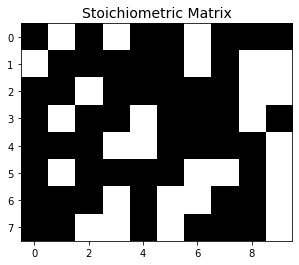


stoic_mtrx=
 [[ 0.  1.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0. -1.  0. -1.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1. -1.]
 [ 0. -1.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.  0. -1.  1.  0.  1.]
 [ 0.  0.  0. -1.  0.  1. -1.  0.  0.  1.]
 [ 0.  0.  1. -1.  0.  1.  0.  0.  0. -1.]]


In [35]:
'''Info on the data'''


### <span style="color:blue">[2.1)](#toa) What is the rank of the stoichiometric matrix. Is it full rank? Or rank deficient? Justify your answer.</span><a id="a21"></a>

In [ ]:
'''Check the rank of the stoichiometric matrix'''


**Rank-related answers:**

### <span style="color:blue">[2.2)](#toa) Compute and report the equilibrium mole fractions for all species as follows (values are for your reference):</span><a id="a22"></a>
    
    formula      species name 
     
      xxxx          name     = 2.313e-01 (23.13%)
      xxxx          name     = 2.043e-01 (20.43%)
      xxxx          name     = 2.025e-01 (20.25%)
      xxxx          name     = 1.113e-01 (11.13%)
      xxxx          name     = 1.017e-01 (10.17%)
      xxxx          name     = 5.292e-02 (5.29%)
      xxxx          name     = 3.604e-02 (3.60%)
      xxxx          name     = 3.163e-02 (3.16%)
      xxxx          name     = 2.764e-02 (2.76%)
      xxxx          name     = 6.888e-04 (0.07%)

In [41]:
'''1.2) Find root and equilibrium molar fractions'''




**********************************************************
               Newton's Method Iterations                 
**********************************************************
k | |K(e_k)|  | |K'(e_k)| | |del e_k| |   |e_k|   | convg|
----------------------------------------------------------
 1  +4.231e+01  +1.062e+04  +1.483e-01  +5.346e-01 0.00
 2  +3.976e+01  +6.545e+03  +1.146e-01  +6.425e-01 1.14
 3  +2.380e+01  +4.910e+03  +3.987e-02  +6.717e-01 1.49
 4  +1.949e+01  +1.223e+04  +7.386e-02  +6.444e-01 0.81
 5  +1.408e+01  +1.606e+04  +1.222e-01  +6.290e-01 0.81
 6  +1.154e+01  +2.109e+04  +1.433e-01  +6.531e-01 0.92
 7  +9.282e+00  +3.080e+04  +1.125e-01  +7.013e-01 1.12
 8  +4.977e+00  +4.237e+04  +7.646e-02  +7.439e-01 1.18
 9  +1.315e+00  +5.440e+04  +2.947e-02  +7.595e-01 1.37
10  +1.011e-01  +6.059e+04  +4.828e-03  +7.593e-01 1.51
11  +6.538e-04  +6.163e+04  +5.117e-04  +7.591e-01 1.42
12  +2.913e-05  +6.168e+04  +3.482e-06  +7.591e-01 1.66


### <span style="color:blue">[2.3)](#toa) Plot all normalized extention of reaction roots:</span><a id="a23"></a>

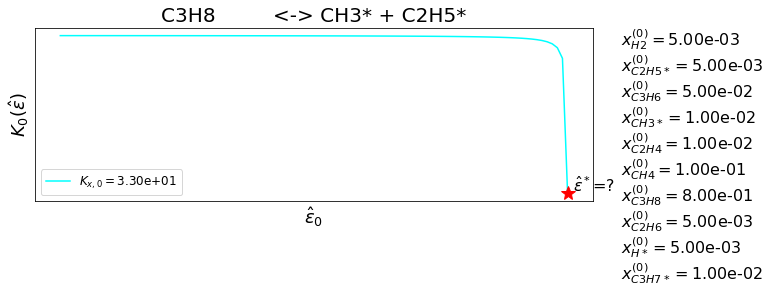

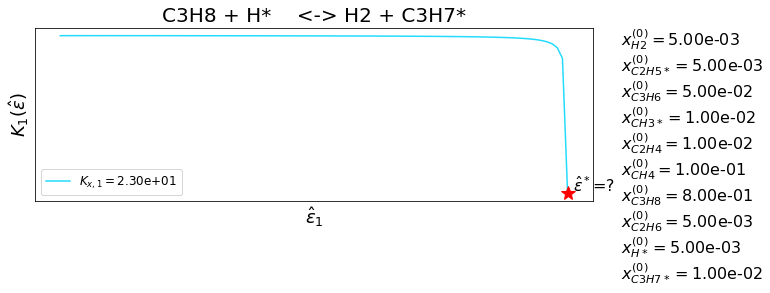

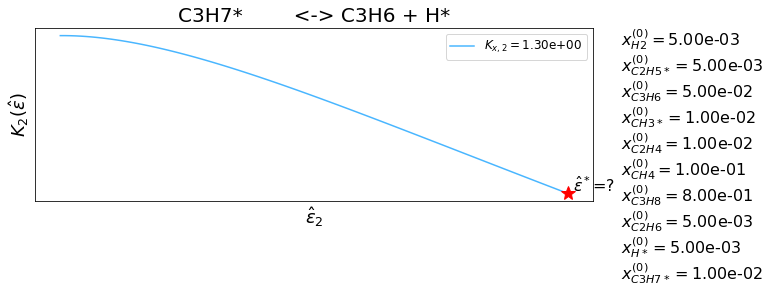

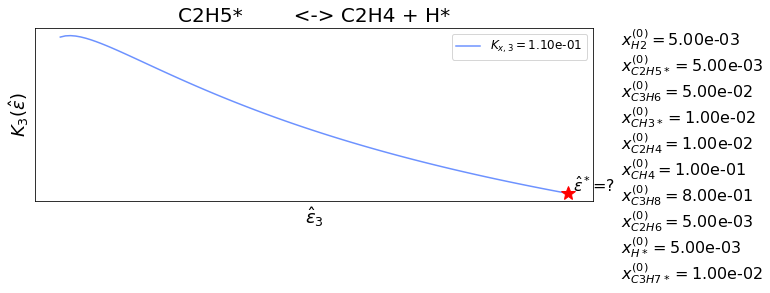

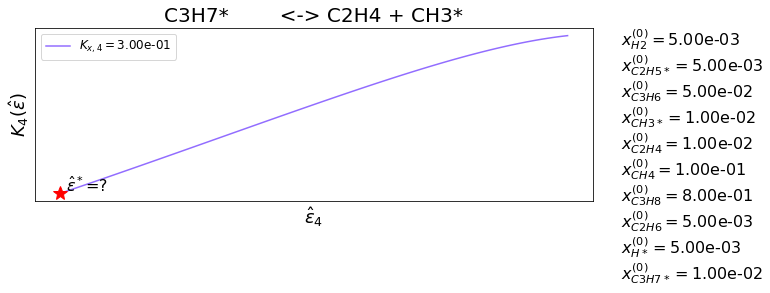

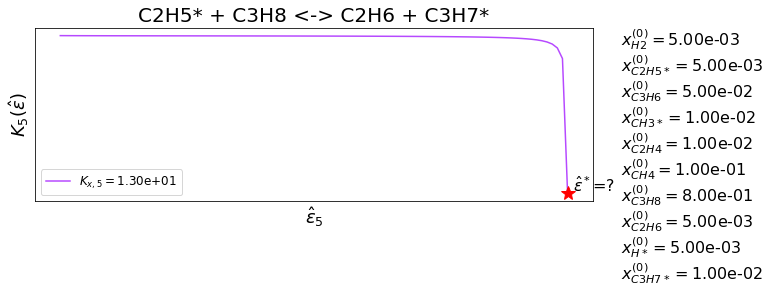

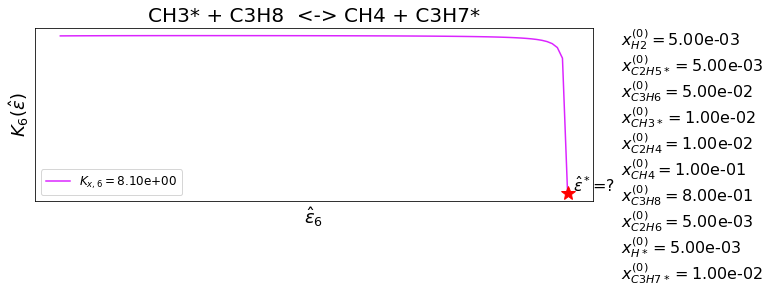

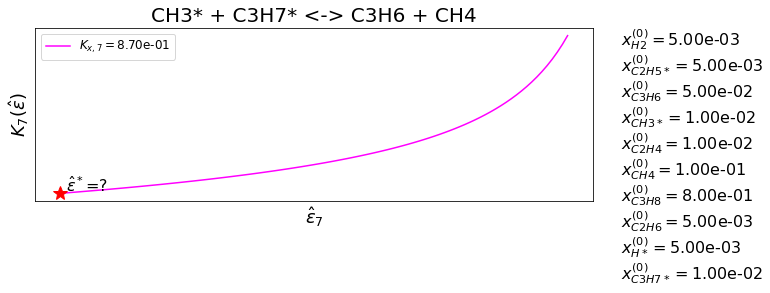

In [42]:
'''1.3) Plot equilibrium vector function'''


### <span style="color:blue">[2.4)](#toa) Summary of key computational steps needed to solve the problem.</span><a id="a24"></a>

## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>